# Characterizing and Predicting Dog Adoption Rates

I am using data sets I obtained from Kaggle: [dog breeds parameters scraped from at dogtime.com](https://www.kaggle.com/hocop1/cat-and-dog-breeds-parameters) and the Austin Animal Center's [intake and outake records.](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/) 

In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from zipfile import ZipFile

In [2]:
!cd ../data_sets/ & ls

austin-animal-center-shelter-intakes-and-outcomes.zip
BikeShare
Bikeshare-Data.zip
cat-and-dog-breeds-parameters.zip
chicago-red-light-and-speed-camera-data.zip
example_files
Fred_CPI_Foodathome_CUSR0000SAF11.csv
LRUN64TTUSA156S.csv
MORTGAGE30US.csv
music_caps
NYC
ny-city-owned-and-leased-property.zip
OnTheSnow_v1.xlsx
ramen-ratings.csv
ramen-ratings.zip
Readme_file.docx
sentiment_sentences
sentiment_sentences.zip
speed_cam
WELLCOME_APCspend2013_forThinkful.csv


In [3]:
with ZipFile(r'../data_sets/austin-animal-center-shelter-intakes-and-outcomes.zip', 'r') as zip:
    zip.extractall()
with ZipFile(r'../data_sets/cat-and-dog-breeds-parameters.zip', 'r') as zip:
    zip.extractall()

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6839-6E71

 Directory of C:\Users\Chris\Documents\thinkful\supervised_learning_capstone

08/08/2019  12:34 AM    <DIR>          .
08/08/2019  12:34 AM    <DIR>          ..
08/03/2019  02:04 PM    <DIR>          .ipynb_checkpoints
08/08/2019  12:34 AM        13,040,169 aac_intakes.csv
08/08/2019  12:34 AM        31,441,583 aac_intakes_outcomes.csv
08/08/2019  12:34 AM        11,648,624 aac_outcomes.csv
08/05/2019  11:43 PM             2,357 Capstone_supervised_learning_notes.ipynb
08/08/2019  12:34 AM           437,931 dog_adoption_SL_capstone.ipynb
08/08/2019  12:34 AM           271,269 rating.json
08/03/2019  04:04 PM                71 README.md
               7 File(s)     56,842,004 bytes
               3 Dir(s)  27,031,982,080 bytes free


In [5]:
shelter_inout_df = pd.read_csv(r'aac_intakes_outcomes.csv')  # I will used the merged file with both intake records and outcome records
shelter_inout_df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [6]:
shelter_inout_df.dtypes

age_upon_outcome               object
animal_id_outcome              object
date_of_birth                  object
outcome_subtype                object
outcome_type                   object
sex_upon_outcome               object
age_upon_outcome_(days)         int64
age_upon_outcome_(years)      float64
age_upon_outcome_age_group     object
outcome_datetime               object
outcome_month                   int64
outcome_year                    int64
outcome_monthyear              object
outcome_weekday                object
outcome_hour                    int64
outcome_number                float64
dob_year                        int64
dob_month                       int64
dob_monthyear                  object
age_upon_intake                object
animal_id_intake               object
animal_type                    object
breed                          object
color                          object
found_location                 object
intake_condition               object
intake_type 

In [7]:
shelter_inout_df.animal_type.unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [8]:
#we are only looking at dogs
shelter_inout_df = shelter_inout_df[shelter_inout_df.animal_type == 'Dog']

# there are a lot of features that i'm not interested, especially that describe the same thing in multiple ways. 
# I am using time in shelter as it is a simple scalar, not d datetime. 
shelter_inout_df = shelter_inout_df.drop(columns=["age_upon_outcome", "animal_id_outcome", "age_upon_outcome_(years)",
                                                  "age_upon_outcome_age_group", "outcome_year", "outcome_monthyear", "outcome_hour",
                                                  "outcome_number", "animal_id_intake", "age_upon_intake_(years)", 
                                                  "age_upon_intake_age_group", "intake_year", "intake_monthyear", "intake_hour",
                                                  "intake_number", "time_in_shelter", "found_location"])
shelter_inout_df.head()

,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),outcome_datetime,outcome_month,outcome_weekday,dob_year,dob_month,...,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),intake_datetime,intake_month,intake_weekday,time_in_shelter_days
0,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,2017-12-07 14:07:00,12,Thursday,2007,7,...,Yellow/White,Normal,Stray,Neutered Male,1,3650,2017-12-07 00:00:00,12,Thursday,0.588194
1,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,2014-12-20 16:35:00,12,Saturday,2007,7,...,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,2014-12-19 10:21:00,12,Friday,1.259722
2,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,2014-03-08 17:10:00,3,Saturday,2007,7,...,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,2014-03-07 14:26:00,3,Friday,1.113889
3,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,2014-04-07 15:12:00,4,Monday,2004,4,...,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,2014-04-02 15:55:00,4,Wednesday,4.970139
4,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,2013-11-16 11:54:00,11,Saturday,1997,10,...,Brown/White,Injured,Public Assist,Neutered Male,1,5840,2013-11-16 09:02:00,11,Saturday,0.119444


In [9]:
shelter_inout_df.pivot_table(index='sex_upon_intake', columns='sex_upon_outcome', values='count', aggfunc=np.sum)

sex_upon_outcome,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
sex_upon_intake,,,,,
Intact Female,4139.0,NaN,NaN,8656.0,NaN
Intact Male,NaN,4854.0,9978.0,NaN,NaN
Neutered Male,NaN,NaN,9452.0,NaN,NaN
Spayed Female,NaN,NaN,NaN,8045.0,NaN
Unknown,NaN,NaN,NaN,NaN,241.0


### Import the dog breed descriptions and inspect data

In [10]:
with open('rating.json', 'r') as rating_file:
    ratings = json.load(rating_file)
    json_normalize(ratings)
    dog_descr_df = pd.DataFrame.from_dict(ratings['dog_breeds'], ).T
dog_descr_df.head()

,Adaptability,All Around Friendliness,Exercise Needs,Health Grooming,Trainability,Adapts Well to Apartment Living,Affectionate with Family,Amount Of Shedding,Dog Friendly,Drooling Potential,...,Potential For Playfulness,Potential For Weight Gain,Prey Drive,Sensitivity Level,Size,Tendency To Bark Or Howl,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Wanderlust Potential
Affenpinscher,3.0,3.0,4.0,2.0,3.0,5.0,5.0,1.0,4.0,1.0,...,4.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,2.0
Afghan Hound,4.0,4.0,4.0,2.0,3.0,5.0,5.0,4.0,4.0,1.0,...,4.0,1.0,5.0,5.0,4.0,2.0,2.0,5.0,5.0,5.0
Airedale Terrier,2.0,4.0,5.0,3.0,5.0,1.0,4.0,2.0,4.0,1.0,...,5.0,4.0,5.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0
Akita,3.0,2.0,4.0,4.0,4.0,2.0,5.0,5.0,1.0,5.0,...,5.0,4.0,4.0,5.0,4.0,5.0,1.0,5.0,2.0,4.0
Alaskan Klee Kai,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,2.0,2.0,...,4.0,2.0,5.0,4.0,2.0,3.0,2.0,5.0,2.0,4.0


In [11]:
dog_descr_df.describe()

,Adaptability,All Around Friendliness,Exercise Needs,Health Grooming,Trainability,Adapts Well to Apartment Living,Affectionate with Family,Amount Of Shedding,Dog Friendly,Drooling Potential,...,Potential For Playfulness,Potential For Weight Gain,Prey Drive,Sensitivity Level,Size,Tendency To Bark Or Howl,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Wanderlust Potential
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,3.116822,4.070093,4.107477,2.995327,3.560748,3.074766,4.700935,3.014019,3.551402,1.705607,...,4.364486,3.294393,3.593458,3.892523,2.841121,3.121495,2.037383,3.331776,3.074766,3.443925
std,0.565351,0.827771,0.818013,0.601232,0.623146,1.575642,0.560264,1.231355,1.227491,1.215034,...,0.803660,0.950545,1.201780,0.818013,1.155916,1.227313,0.953622,1.209206,0.941490,1.208008
min,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,3.000000,4.000000,1.000000,...,5.000000,3.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000
75%,3.000000,5.000000,5.000000,3.000000,4.000000,5.000000,5.000000,4.000000,5.000000,2.000000,...,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
dog_descr_df.columns = dog_descr_df.columns.str.strip()
dog_descr_df.columns = dog_descr_df.columns.str.replace(" ", "_")

In [13]:
dog_descr_df.Exercise_Needs.head()

,Exercise_Needs,Exercise_Needs
Affenpinscher,4.0,3.0
Afghan Hound,4.0,4.0
Airedale Terrier,5.0,5.0
Akita,4.0,4.0
Alaskan Klee Kai,4.0,4.0


In [14]:
# Combine two identical features into one
dog_descr_df.columns.get_loc("Exercise_Needs").nonzero()  # get column numbers

(array([ 2, 13], dtype=int64),)

In [15]:
dog_descr_df["Exercise_Need"] = dog_descr_df.iloc[:,[2]] + dog_descr_df.iloc[:,[13]]
dog_descr_df = dog_descr_df.drop(columns=["Exercise_Needs"])
dog_descr_df.loc[:,dog_descr_df.columns.str.contains("Exer*")].head()

,Exercise_Need
Affenpinscher,7.0
Afghan Hound,8.0
Airedale Terrier,10.0
Akita,8.0
Alaskan Klee Kai,8.0


In [16]:
dog_descr_df[dog_descr_df.isna().any(axis=1)]

,Adaptability,All_Around_Friendliness,Health_Grooming,Trainability,Adapts_Well_to_Apartment_Living,Affectionate_with_Family,Amount_Of_Shedding,Dog_Friendly,Drooling_Potential,Easy_To_Groom,...,Potential_For_Weight_Gain,Prey_Drive,Sensitivity_Level,Size,Tendency_To_Bark_Or_Howl,Tolerates_Being_Alone,Tolerates_Cold_Weather,Tolerates_Hot_Weather,Wanderlust_Potential,Exercise_Need
Korean Jindo Dog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Xoloitzcuintli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# two rows of just null. These are not helpful.
dog_descr_df = dog_descr_df.dropna(axis=0)

In [18]:
#Should some of these dog features be trimmed?
dog_desc_corr_df = dog_descr_df.corr()

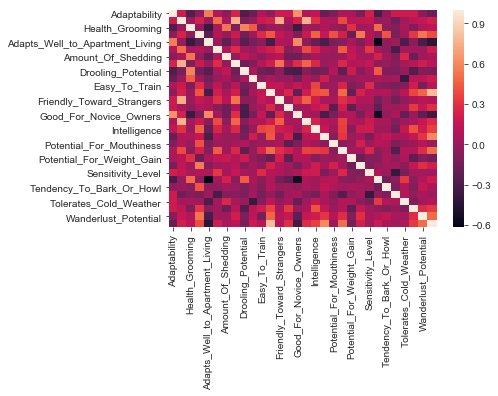

In [19]:
sns.set_style('ticks')
sns.heatmap(dog_desc_corr_df);

In [20]:
dog_high_corr = dog_desc_corr_df[(dog_desc_corr_df.abs() > .65) & ~(dog_desc_corr_df == 1)]
for i, row in dog_high_corr.iterrows():
    if row.sum() > 0: 
        print("{} is correlated with: ".format(i), end = '') 
        for ind, col in row.iteritems():
            if ~np.isnan(col):
                print("{} at {}".format(ind, col))
        print("\n")


All_Around_Friendliness is correlated with: Dog_Friendly at 0.7565146009482395
Friendly_Toward_Strangers at 0.7509267951607245
Incredibly_Kid_Friendly_Dogs at 0.7605389789255196


Dog_Friendly is correlated with: All_Around_Friendliness at 0.7565146009482395


Energy_Level is correlated with: Exercise_Need at 0.8029938934844397


Friendly_Toward_Strangers is correlated with: All_Around_Friendliness at 0.7509267951607245


Incredibly_Kid_Friendly_Dogs is correlated with: All_Around_Friendliness at 0.7605389789255196


Exercise_Need is correlated with: Energy_Level at 0.8029938934844397




In [21]:
#some models will not work well with multicolinearity. I will get rid of highly correlated features.
dog_descr_df = dog_descr_df.drop(columns=["Friendly_Toward_Strangers", "Incredibly_Kid_Friendly_Dogs", "Dog_Friendly", "Intensity",
                                         "Exercise_Need"])

## Feature Augmentation

I will use the numerical features describing breeds to replace an important but difficult to use feature on the main dataset (dog breed) with a set of ordered numerical features. 


In [22]:
shelter_inout_df[["breed"]].isna().sum()

breed    0
dtype: int64

In [23]:
#we are only getting 1/2 match rate now.
TEST = pd.merge(left=shelter_inout_df, right=dog_descr_df, left_on="breed", right_index=True)
TEST.shape

(2049, 49)

In [24]:
shelter_inout_df.shape

(45366, 24)

In [36]:
#for bree in shelter_inout_df.breed.unique():
#    print("\'{}\'".format(bree))
shelter_inout_df.breed.unique()

array(['Spinone Italiano', 'Dachshund', 'Shetland Sheepdog',
       'Labrador Retriever', 'Miniature Schnauzer', 'Lhasa Apso',
       'Border Collie', 'Chihuahua Shorthair', 'German Shepherd Dog',
       'Newfoundland', 'Pug', 'Staffordshire', 'Catahoula Leopard Dog',
       'Queensland Heeler', 'Rottweiler', 'Smooth Fox Terrier',
       'Rat Terrier', 'Chihuahua', 'American Pit Bull Terrier',
       'Bichon Frise', 'Jack Russell Terrier', 'Harrier', 'Pointer',
       'American Eskimo', 'Doberman Pinscher', 'Parson Russell Terrier',
       'Australian Shepherd', 'Chow Chow', 'Australian Cattle Dog',
       'Siberian Husky', 'Beagle', 'Golden Retriever', 'Chinese Sharpei',
       'Pit Bull', 'Cocker Spaniel', 'Blue Lacy', 'Bernese Mountain Dog',
       'Greyhound', 'Great Pyrenees', 'German Shepherd',
       'Cardigan Welsh Corgi', 'Boston Terrier', 'Poodle', 'Bullmastiff',
       'German  Pointer', 'Weimaraner', 'Pekingese', 'Rhod Ridgeback',
       'Field Spaniel', 'Manchester Terrier

In [26]:
#the breed field from the shelter db as a lot of mixes and multiple breeds listed. Lets clean that.
shelter_inout_df.breed = shelter_inout_df.breed.str.strip()

shelter_inout_df["mix"] = shelter_inout_df.breed.str.contains('Mix', regex=False).astype(int)  # this could be a useful feature
shelter_inout_df.breed = shelter_inout_df.breed.str.replace('Mix', '', regex=False)
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Terr(?=[$\n \/])', 'Terrier', regex=True)  # Found below
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Eng(?=[$\n \/])', 'English', regex=True)  
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Port(?=[$\n \/])', 'Portuguese', regex=True)  
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Span(?=[$\n \/])', 'Spaniel', regex=True) 
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Pinsch(?=[$\n \/])', 'Pinscher', regex=True)  
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Catahoula(?=[$\n \/])', 'Catahoula Leopard Dog', regex=True) 

shelter_inout_df["shorthair"] = shelter_inout_df.breed.str.contains(r'Shorthair(?=[$\n \/])', regex=True).astype(int)  
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Shorthair(?=[$\n \/])', '', regex=True)  

shelter_inout_df["longhair"] = shelter_inout_df.breed.str.contains(r'Longhair(?=[$\n \/])', regex=True).astype(int)
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Longhair(?=[$\n \/])', '', regex=True)  

shelter_inout_df["wirehair"] = shelter_inout_df.breed.str.contains(r'Wirehair(?=[$\n \/])', regex=True).astype(int) 
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Wirehair(?=[$\n \/])', '', regex=True)  

shelter_inout_df["roughcoat"] = shelter_inout_df.breed.str.contains(r'Rough Coat(?=[$\n \/])', regex=True).astype(int)
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Rough Coat(?=[$\n \/])', '', regex=True)  

#Breed name shouldn't be split
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Black/Tan', 'Black and Tan Coonhound', regex=False)

#misaligned names
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'Pit Bull(?=[$\n \/])', 'American Pit Bull Terrier', regex=True)
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'German Shepherd(?=[$\n \/])', 'German Shepherd Dog', regex=True)
shelter_inout_df.breed = shelter_inout_df.breed.str.replace(r'(Miniature |Toy |Standard )?Poodle(?=[$\n \/])', 'Poodle',
                                                            regex=True)  # Not sure if should add a feature for poodle type

In [27]:
shelter_inout_df.breed.value_counts().sort_values(ascending=False)

American Pit Bull Terrier                        6256
Chihuahua                                        5202
Labrador Retriever                               4789
German Shepherd Dog                              1950
Australian Cattle Dog                            1099
Dachshund                                         811
Poodle                                            787
Boxer                                             683
Border Collie                                     662
Catahoula Leopard Dog                             480
Rat Terrier                                       469
Australian Shepherd                               468
Yorkshire Terrier                                 447
Siberian Husky                                    441
Jack Russell Terrier                              429
Miniature Schnauzer                               402
Beagle                                            392
Staffordshire                                     375
Great Pyrenees              

In [28]:
# get breed names x & y for x y mix
shelter_inout_df[["breed", "breed2"]] = shelter_inout_df.breed.str.split(pat="/", expand=True, n=1)

In [29]:
# run again after replacing names
shelter_inout_df.breed = shelter_inout_df.breed.str.strip()
shelter_inout_df.breed2 = shelter_inout_df.breed2.str.strip()

In [30]:
#Breed names with multiple matches - just the Black/Tan. fixed in cell above now.
#NotNeeded shelter_inout_df[shelter_inout_df.breed.str.contains("/[\w\s]+/", regex=True)]["breed"]

In [37]:
#lets find which breed names exist in shelter info but not breed info df, and add add fixes to the feature above
dog_descr_df.index.names = ['breed']  
shelter_dog_list_df = pd.DataFrame(pd.concat([shelter_inout_df.breed, shelter_inout_df.breed2], axis=0) \
                                   ).rename(columns={0:"breed"})
shelter_breed_list_df = pd.merge(left=shelter_dog_list_df, right=dog_descr_df, left_on='breed', right_on="breed", indicator=True,
                                  how='outer')
shelter_only_breeds_df = shelter_breed_list_df[shelter_breed_list_df._merge == 'left_only']
shelter_only_breeds_df["breed"].value_counts().sort_values(ascending=False)

Chihuahua Shorthair                           775
Pit Bull                                      711
German Shepherd                               608
Staffordshire                                 453
Anatol Shepherd                               411
Plott Hound                                   388
Miniature Poodle                              320
Chinese Sharpei                               236
Queensland Heeler                             210
American American Pit Bull Terrier Terrier    210
Rhod Ridgeback                                147
Catahoula                                     143
Collie Smooth                                 131
English Bulldog                               131
Black and Tan Coonhound Hound                 114
Alaskan Husky                                 103
Flat Coat Retriever                           102
Redbone Hound                                  99
Carolina Dog                                   97
Doberman Pinsch                                81


In [32]:
pd.set_option('display.max_columns', 500)

In [33]:
#merge dataframes on cleaned breed colombs
shelter_inout_wbreeds_df = pd.merge(left=shelter_inout_df, right=dog_descr_df, left_on="breed", right_index=True, how='left')
shelter_inout_wbreeds_df[shelter_inout_wbreeds_df.Prey_Drive.isna()]

,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),outcome_datetime,outcome_month,outcome_weekday,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),intake_datetime,intake_month,intake_weekday,time_in_shelter_days,mix,shorthair,longhair,wirehair,roughcoat,breed2,Adaptability,All_Around_Friendliness,Health_Grooming,Trainability,Adapts_Well_to_Apartment_Living,Affectionate_with_Family,Amount_Of_Shedding,Drooling_Potential,Easy_To_Groom,Easy_To_Train,Energy_Level,General_Health,Good_For_Novice_Owners,Intelligence,Potential_For_Mouthiness,Potential_For_Playfulness,Potential_For_Weight_Gain,Prey_Drive,Sensitivity_Level,Size,Tendency_To_Bark_Or_Howl,Tolerates_Being_Alone,Tolerates_Cold_Weather,Tolerates_Hot_Weather,Wanderlust_Potential
0,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,2017-12-07 14:07:00,12,Thursday,2007,7,2017-12,10 years,Dog,Spinone Italiano,Yellow/White,Normal,Stray,Neutered Male,1,3650,2017-12-07 00:00:00,12,Thursday,0.588194,1,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,2014-12-20 16:35:00,12,Saturday,2007,7,2014-12,7 years,Dog,Spinone Italiano,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,2014-12-19 10:21:00,12,Friday,1.259722,1,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,2014-03-08 17:10:00,3,Saturday,2007,7,2014-03,6 years,Dog,Spinone Italiano,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,2014-03-07 14:26:00,3,Friday,1.113889,1,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,2016-10-07 12:34:00,10,Friday,1999,6,2016-10,17 years,Dog,Chihuahua Shorthair,Tan/Black,Aged,Public Assist,Neutered Male,1,6205,2016-09-28 12:05:00,9,Wednesday,9.020139,0,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1999-05-02 00:00:00,Suffering,Euthanasia,Spayed Female,5840,2015-04-29 13:42:00,4,Wednesday,1999,5,2015-04,16 years,Dog,Staffordshire,Brown/White,Injured,Stray,Spayed Female,1,5840,2015-04-28 15:08:00,4,Tuesday,0.940278,1,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2001-03-20 00:00:00,Suffering,Euthanasia,Intact Male,4745,2015-03-13 17:01:00,3,Friday,2001,3,2015-03,13 years,Dog,Queensland Heeler,Blue Merle,Aged,Euthanasia Request,Intact Male,1,4745,2015-03-13 15:20:00,3,Friday,0.070139,0,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2001-07-10 00:00:00,NaN,Return to Owner,Neutered Male,4745,2014-07-09 12:00:00,7,Wednesday,2001,7,2014-07,12 years,Dog,Smooth Fox Terrier,Black/Tricolor,Normal,Stray,Neutered Male,1,4380,2014-07-05 07:13:00,7,Saturday,4.199306,1,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2002-07-23 00:00:00,Behavior,Euthanasia,Neutered Male,4380,2014-09-05 14:31:00,9,Friday,2002,7,2014-09,12 years,Dog,American Eskimo,Cream,Normal,Stray,Neutered Male,1,4380,2014-08-27 13:11:00,8,Wednesday,9.055556,1,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2000-04-03 00:00:00,NaN,Return to Owner,Neutered Male,6205,2017-04-13 11:56:00,4,Thursday,2000,4,2017-04,17 years,Dog,Parson Russell Terrier,White/Black,Normal,Stray,Neutered Male,1,6205,2017-04-12 16:04:00,4,Wednesday,0.827778,1,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,1997-02-07 00:00:00,NaN,Return to Owner,Spayed Fema

In [34]:
#for breed in dog_descr_df.index:
#    print(breed)